<a href="https://colab.research.google.com/github/mojoyinkimberly/blood_tranfusion_app/blob/main/BloodClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import joblib as jb

**reading dataset into python environment**

In [ ]:
blood_dataset = pd.read_csv("/content/transfusion.data.csv", sep = ",")
blood_dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


****

**renaming columns**

In [ ]:
renamed_blood = blood_dataset.rename(columns={'whether he/she donated blood in March 2007' : 'Donation StatusApril(2007)'})

**checking for information about dataset**

In [ ]:
renamed_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Recency (months)            748 non-null    int64
 1   Frequency (times)           748 non-null    int64
 2   Monetary (c.c. blood)       748 non-null    int64
 3   Time (months)               748 non-null    int64
 4   Donation StatusApril(2007)  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


**checking for missing values**

In [ ]:
renamed_blood.isna().sum()

Recency (months)              0
Frequency (times)             0
Monetary (c.c. blood)         0
Time (months)                 0
Donation StatusApril(2007)    0
dtype: int64

**plotting line graphs for analysis**

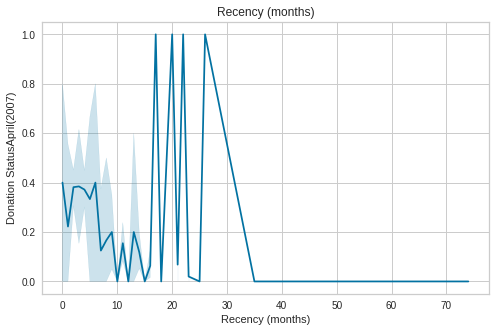

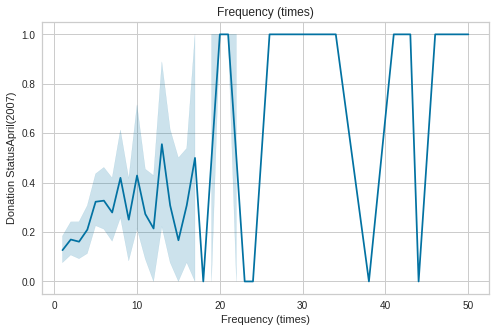

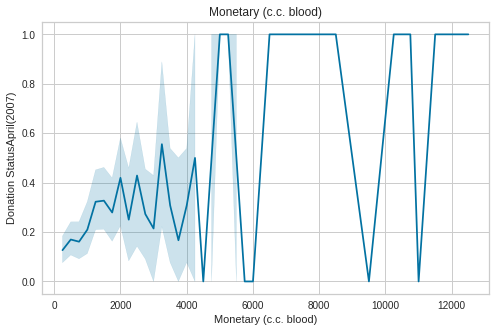

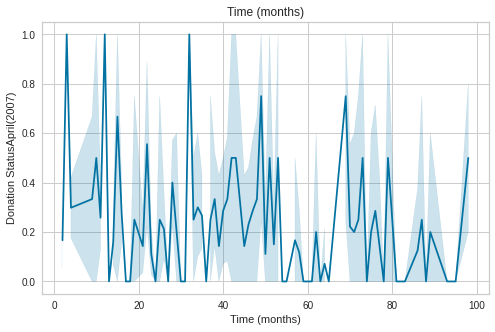

In [ ]:
for column in ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']:
  plt.figure(figsize=(8, 5))
  sns.lineplot(data = renamed_blood, x = column,y = 'Donation StatusApril(2007)')
  plt.title(column)
  plt.show()

**using the describe function to check the statistical summary of dataset**

In [ ]:
renamed_blood.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donation StatusApril(2007)
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


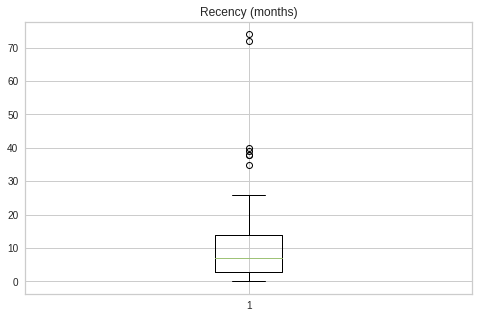

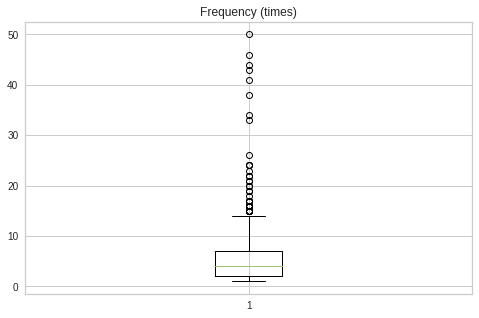

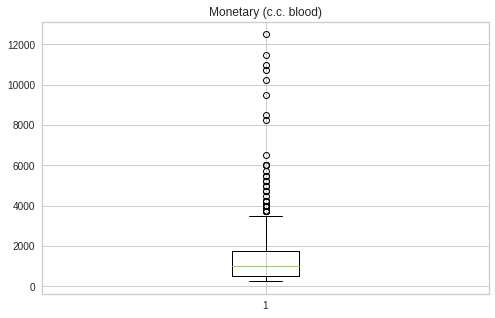

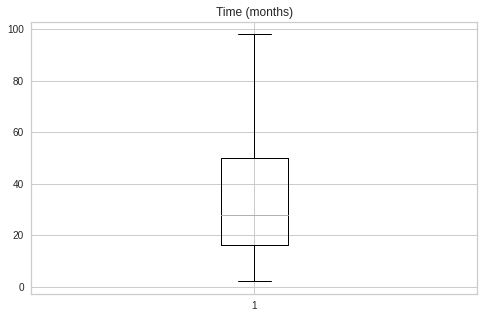

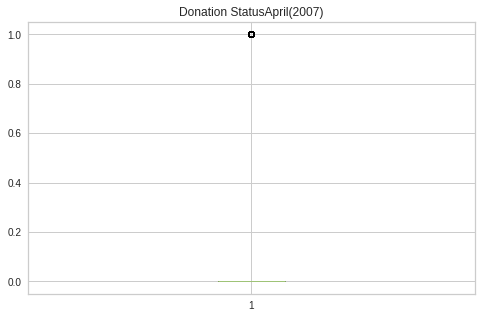

In [ ]:
for column in ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)','Donation StatusApril(2007)']:
  plt.figure(figsize=(8, 5))
  plt.boxplot(data = renamed_blood, x = column)
  plt.title(column)
  plt.show()

In [ ]:
renamed_blood['Recency (months)'] = np.where(renamed_blood['Recency (months)'] >14.000000 , 14.000000, renamed_blood['Recency (months)'])
renamed_blood['Frequency (times)'] = np.where(renamed_blood['Frequency (times)'] >7.000000 , 7.000000, renamed_blood['Frequency (times)'])
renamed_blood['Monetary (c.c. blood)'] = np.where(renamed_blood['Monetary (c.c. blood)'] >1750.000000 , 1750.000000, renamed_blood['Monetary (c.c. blood)'])

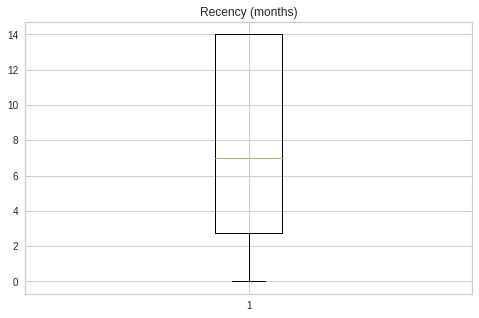

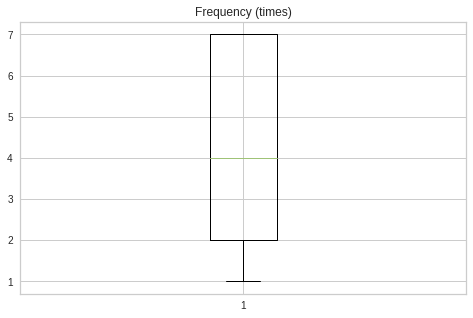

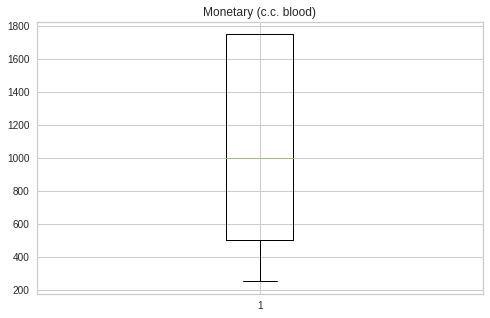

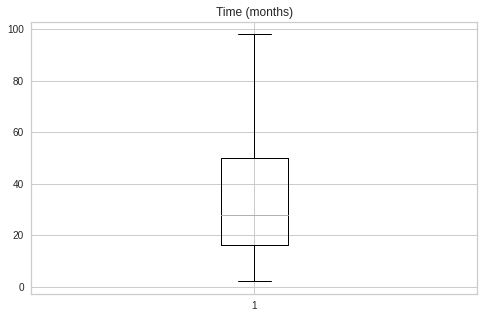

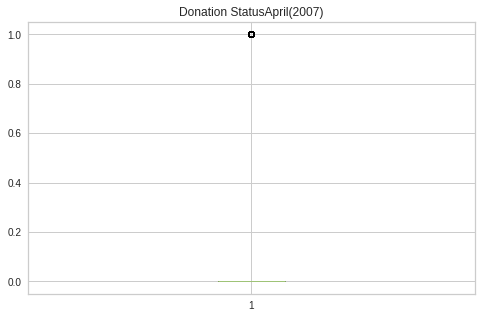

In [ ]:
for column in ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)','Donation StatusApril(2007)']:
  plt.figure(figsize=(8, 5))
  plt.boxplot(data = renamed_blood, x = column)
  plt.title(column)
  plt.show()

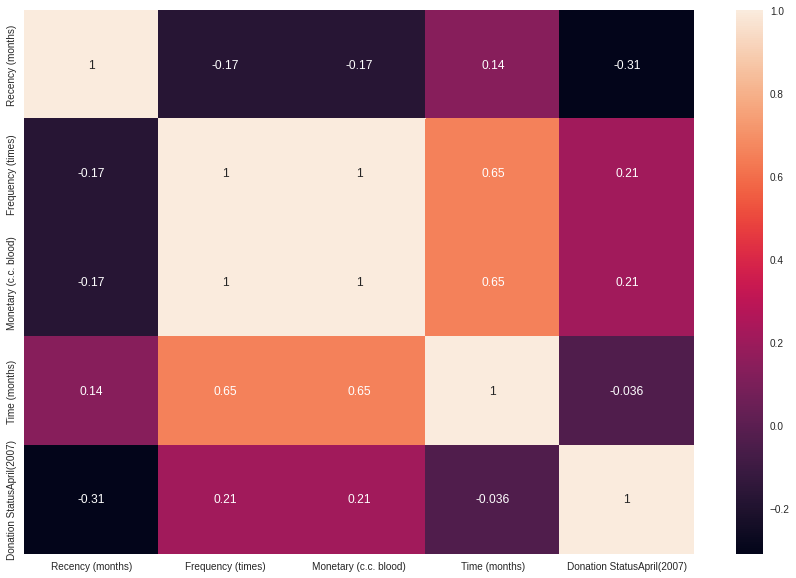

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(renamed_blood.corr(), annot = True)

In [ ]:
y = renamed_blood['Donation StatusApril(2007)']
x = renamed_blood.drop(['Donation StatusApril(2007)','Frequency (times)'], axis = 1)

In [ ]:
def calcu_mult(df):
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return vif

In [ ]:
calcu_mult(x)

,variables,VIF
0,Recency (months),2.136855
1,Monetary (c.c. blood),5.040131
2,Time (months),5.798224


In [ ]:
y.value_counts()

0    570
1    178
Name: Donation StatusApril(2007), dtype: int64

In [ ]:
random = RandomOverSampler(random_state= 0)
x,y = random.fit_resample(x,y)

In [ ]:
y.value_counts()

1    570
0    570
Name: Donation StatusApril(2007), dtype: int64

In [ ]:
normalizer = StandardScaler()
normed = pd.DataFrame(normalizer.fit_transform(x))

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(normed, y, test_size = .20, random_state=45)

In [ ]:
pca = PCA(n_components=3)
pca_model = pca.fit(normed)

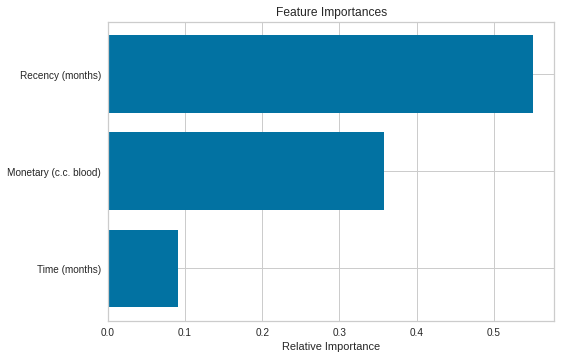

In [ ]:
features = x.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-5:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 1.0, 'Elbow curve')

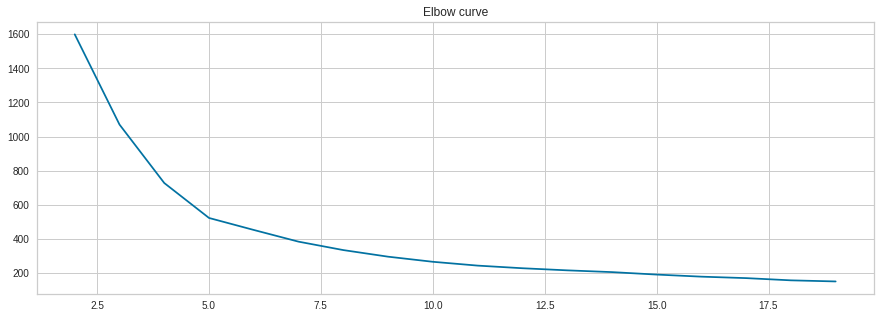

In [ ]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

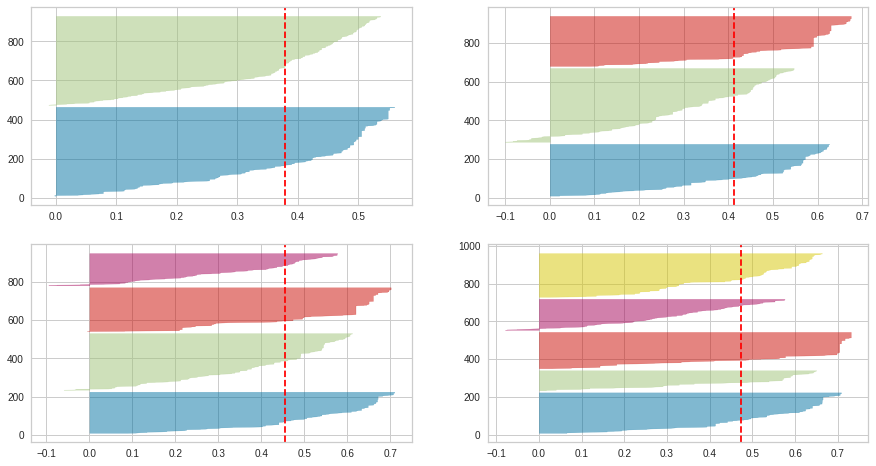

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train,y_train)

In [ ]:
jb.dump(knn_model,"knn_model.jb")

['knn_model.jb']

In [ ]:
knn_model.score(X_train,y_train)

0.7949561403508771

In [ ]:
y_predict = knn_model.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_predict)

array([[71, 36],
       [23, 98]])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       107
           1       0.73      0.81      0.77       121

    accuracy                           0.74       228
   macro avg       0.74      0.74      0.74       228
weighted avg       0.74      0.74      0.74       228



In [ ]:
Cv_ = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
score = cross_val_score(knn_model, x_test, y_test, scoring = "accuracy", cv = Cv_, n_jobs=1, error_score="raise")
np.mean(score)

0.7116106719367588